* <b>Scientific Segmentation</b> is a unsupervised learning technique where we use algorithm to come up with rules for segmentation of the observation using various mechanism among which the most commonly used is similarity and the algorithm used is K-Means.

* <b>K-Means</b> provide a straightforward approach to find structure in unstructured data. To understand K-Means we need to understand the following things.

> <b>Similarity</b> is a term that is used to measure the distance between two elements and helps in influencing the shape of the cluster. K-Means clustering supports various kinds of distance measures, such as:<br>
1) <b>Euclidean Distance:</b> Measure the distance between two points using dstance formula. <br>
2) <b>Manhattan Distance:</b> The Manhattan distance is the simple sum of the horizontal and vertical components.<br>
3) <b>Cosine Similarity: </b>We take the angle between the two vectors formed by joining the origin point.If the value of cosine similarity is high then they are similar and if it is low then they are less similar. <br>

> <b>Pre-Requisites</b><br>
1) As we are using distance based formulas to find the correct similarity, all the varibles should be on same scale and hence data should be Standardized.<br>
2) Missing values should be handeld and imputed properly for the better working of K-Means.<br>
3) Categorical variables should be converted into continuous variables for th proper working of K-Means.<br>
4) Feature Reduction techniques should be used to reduce the dimensions. and we can check multicollinearity for similar variables or use VIF.<br>


 #### Working of K-Means 
 1) Initialize K random centroids.You could pick K random data points and make those your starting points.Otherwise, you pick K random values for each variable.<br>
2) For every data point, look at which centroid is nearest to it.Using some sort of measurement like Euclidean or Cosine distance.<br>
3) Assign the data point to the nearest centroid.<br>
4) For every centroid, move the centroid to the average of the points assigned to that centroid.<br>
5) Repeat the last three steps until the centroid assignment no longer changes.The algorithm is said to have “converged” once there are no more changes.<br>

#### Best Value of K
1) Generally the typical rangeof k is 3 to 12.<br>
2) There are multiple ways of finding the best value of K.<br>
* Profiling of the data and using human intiution for choosing best value of K on the basis of data understanding.
* If the cluster size is highly uneven then this can indicate towards wrong value of k
* Technical Approach 

><i><b> Silhouette Method</b><br>
    *  It calculates the average distance of points within its cluster a (i) and the average distance of the points to its next closest cluster called b (i) and we will calculate 
SILHOUETTE SCORE = b(i)-a(i)/larger of b(i)&a(i)<br>
    * Note : The a (i) value must be less than the b (i) value, that is ai<<bi.  
    
><i><b> Pseudo F value/ Overall Variance</b><br>
    * Psuedo F describes the ratio of between cluster variance to within-cluster variance. If Psuedo F is decreasing, that means either the within-cluster variance is increasing or staying static (denominator) or the between cluster variance is decreasing (numerator).
    * Within cluster variance really just measures how tight your clusters fit together. The higher the number the more dispersed the cluster, the lower the number the more focused the cluster. Between cluster variance measures how seperated clusters are from each other.
    * K-means objective is to minimize within cluster variance (necessarily maximizing between cluster variance). So the way that you can interpret this is: as the number of clusters increase the within cluster variance increases, making the actual clusters more dispersed/less compact and therefore less effective (and potentially closer to other clusters).<br>
    
> <i><b> Elbow Method</b><br>
    * The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 i), and for each value of k calculate the sum of squared errors (SSE).Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. 

### Business Problem

Let's imagine you're owning a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score, which is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

The main aim of this problem is learning the purpose of the customer segmentation concepts, also known as market basket analysis, trying to understand customers and separate them in different groups according to their preferences, and once the division is done, this information can be given to marketing team so they can plan the strategy accordingly.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
import scipy.stats as stats
import pandas_profiling


In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn import metrics

<a href = "https://www.kaggle.com/shwetabh123/mall-customers">Link for Dataset</a>

In [48]:
telco = pd.read_csv('Mall_customers.csv')

In [49]:
telco.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
telco.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [51]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [52]:
telco.shape

(200, 5)

In [53]:
telco = telco.rename(columns={'Annual Income (k$)':'Annual_income','Spending Score (1-100)':'Spending_score'})

In [54]:
X = telco.iloc[:,[3,4]]

In [55]:
X

,Annual_income,Spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


C:\Users\jagz.000\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


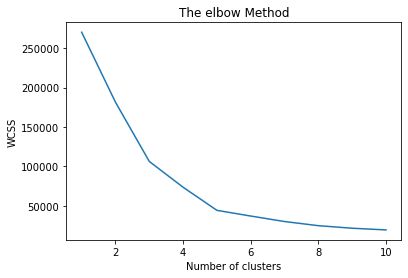

In [56]:
# how to find the relevant set of clusters?
#elbow method
from sklearn.cluster import k_means
wcss = [] #within the cluster sum of squares # homogenity
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,init='k-means++',random_state=123)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_) 
plt.plot(range(1,11),wcss)
plt.title("The elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
    

In [57]:
Kmeans = KMeans(n_clusters=5,init='k-means++',random_state=123).fit_predict(X)

In [61]:
print(Kmeans)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [65]:
telco['Clusters'] = Kmeans

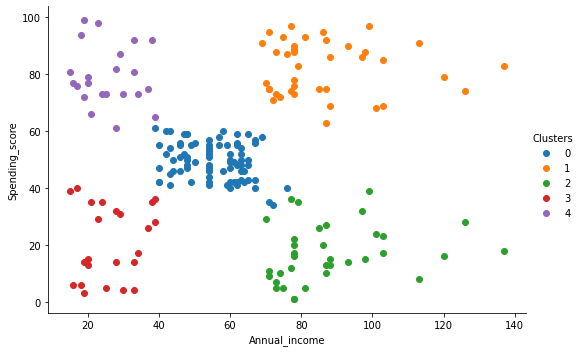

In [67]:
fig = sns.FacetGrid(data=telco,hue='Clusters',height=5,aspect=1.5)
fig.map(plt.scatter,'Annual_income','Spending_score').add_legend()